# Load data from THE MNIST DATABASE
http://yann.lecun.com/exdb/mnist/
https://github.com/rasbt/python-machine-learning-book-2nd-edition

In [21]:
% ls "data\"

 Volume in drive C is OS
 Volume Serial Number is D4F8-2F03

 Directory of C:\Users\mattt_000\Documents\MachineLearning101\MachineLearning101\NMIST\data

11/08/2019  20:02    <DIR>          .
11/08/2019  20:02    <DIR>          ..
11/08/2019  20:01         1,648,877 t10k-images-idx3-ubyte.gz
11/08/2019  20:01             4,542 t10k-labels-idx1-ubyte.gz
11/08/2019  20:01         9,912,422 train-images-idx3-ubyte.gz
11/08/2019  20:01            28,881 train-labels-idx1-ubyte.gz
               4 File(s)     11,594,722 bytes
               2 Dir(s)  31,496,708,096 bytes free


In [22]:
import os
import struct
import numpy as np
import gzip
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte.gz' % kind)
        
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return images, labels

In [23]:
X_train, y_train = load_mnist('data/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [24]:
X_test, y_test = load_mnist('data/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))
y_test_orig = y_test

Rows: 10000, columns: 784


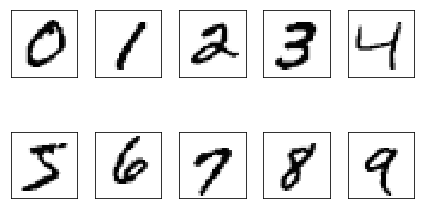

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

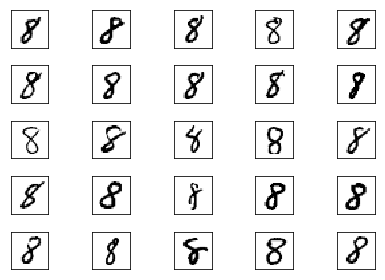

In [26]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 8][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

In [27]:
X_train[0].shape

(784,)

In [9]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

C:\Users\mattt_000\Anaconda3\envs\keras\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

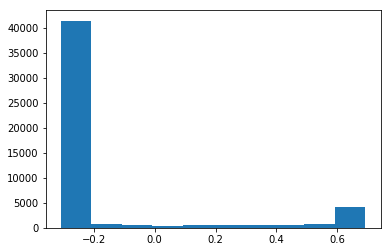

In [29]:
import numpy as np
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(X_train.flatten()[0:50000])
plt.show()

In [32]:
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]
print('input_dim: %d features/attributes, nb_classes: %d classes' % (input_dim, nb_classes))

input_dim: 784 features/attributes, nb_classes: 10 classes


In [255]:
# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(1500, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [272]:
#https://keras.io/getting-started/sequential-model-guide/
model = Sequential()
# Dense(128) is a fully-connected layer with 128 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, input_dim-dimensional vectors.
model.add(Dense(128, activation='relu', input_dim=input_dim))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

In [273]:
# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [274]:
batch_size = 64
num_classes = 10
epochs = 6

In [275]:
print("Training...")
#model.fit(X_train, y_train, nb_epoch=epochs, batch_size=batch_size, verbose=2, validation_data=[X_test, y_test])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.1)

Training...
Train on 54000 samples, validate on 6000 samples
Epoch 1/6
 - 6s - loss: 0.4269 - val_loss: 0.1299
Epoch 2/6
 - 6s - loss: 0.2172 - val_loss: 0.1006
Epoch 3/6
 - 6s - loss: 0.1789 - val_loss: 0.1042
Epoch 4/6
 - 5s - loss: 0.1572 - val_loss: 0.0976
Epoch 5/6
 - 6s - loss: 0.1455 - val_loss: 0.0802
Epoch 6/6
 - 6s - loss: 0.1379 - val_loss: 0.1035


In [276]:
print("Generating test predictions...")
y_pred = model.predict_classes(X_test, verbose=1)

Generating test predictions...
10000/10000 [==============================] - 1s 79us/step


In [277]:
y_pred[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

<IPython.core.display.Javascript object>


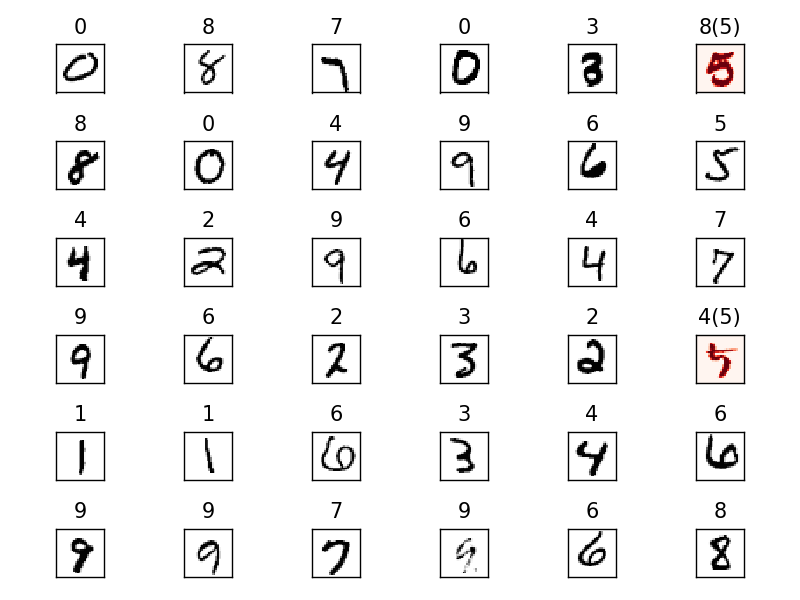

In [278]:
import matplotlib.pyplot as plt
import random
%matplotlib notebook

ncols = 6
nrows = 6
random_preds_index = random.sample(range(X_test.shape[0]), ncols*nrows)


fig, ax = plt.subplots(ncols=ncols, nrows=ncols, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(ncols*nrows):
    j = random_preds_index[i]
    img = X_test[j].reshape(28, 28)

    if y_pred[j]==y_test_orig[j]:
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f"{y_pred[j]}")
    else:
        ax[i].imshow(img, cmap='Reds', interpolation='nearest')
        ax[i].set_title(f"{y_pred[j]}({y_test_orig[j]})")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

In [279]:
import pandas as pd
results = pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Predicted Label": y_pred, "Real Label":y_test_orig})
display(results.head())

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test_orig, y_pred))
display(cm)



,ImageId,Predicted Label,Real Label
0,1,7,7
1,2,2,2
2,3,1,1
3,4,0,0
4,5,4,4


,0,1,2,3,4,5,6,7,8,9
0,971,0,1,0,1,2,1,1,2,1
1,0,1128,3,0,0,1,1,0,2,0
2,4,2,1011,1,2,0,1,8,3,0
3,1,1,9,974,0,6,0,8,8,3
4,0,1,2,0,960,1,1,2,2,13
5,3,4,0,16,2,852,6,1,6,2
6,7,3,2,0,23,4,915,0,4,0
7,1,8,15,4,2,0,0,994,0,4
8,6,5,11,9,4,4,2,6,922,5
9,3,10,2,7,14,4,1,12,4,952


In [280]:
ids_wrong = results[results['Predicted Label']!=results['Real Label']]

In [281]:
def ids_wrong_specify(pred,real):
    return results[(results['Predicted Label']==pred) & (results['Real Label']==real)]

ids_wrong_94 = results[(results['Predicted Label']==9) & (results['Real Label']==4)]
ids_correct = results[results['Predicted Label']==results['Real Label']]
ids_wrong = results[results['Predicted Label']!=results['Real Label']]
print(f"Wrong: {100*ids_wrong.shape[0]/X_test.shape[0]}%")

Wrong: 3.21%


<IPython.core.display.Javascript object>


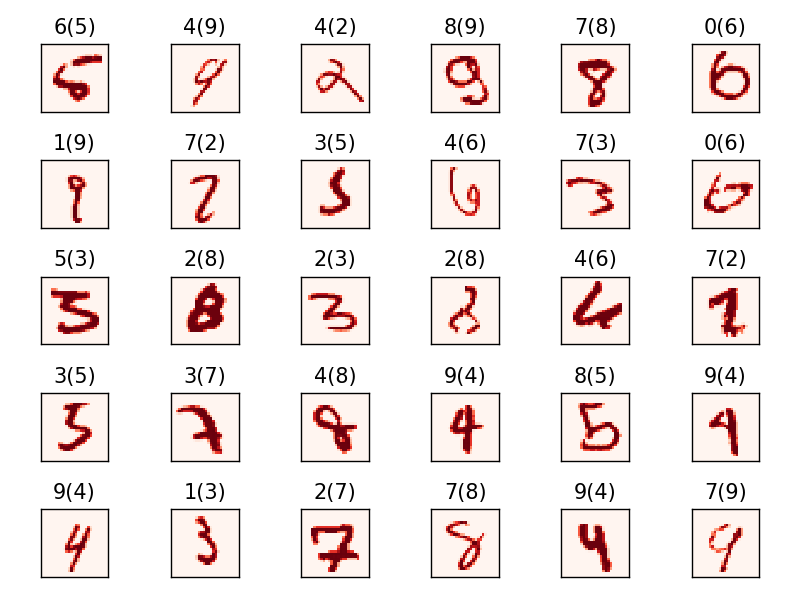

In [282]:
import matplotlib.pyplot as plt
import random
%matplotlib notebook

ncols = 6
nrows = 5
random_preds_index = ids_wrong.index.tolist()


fig, ax = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(ncols*nrows):
    j = random_preds_index[i]
    img = X_test[j].reshape(28, 28)

    if y_pred[j]==y_test_orig[j]:
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f"{y_pred[j]}")
    else:
        ax[i].imshow(img, cmap='Reds', interpolation='nearest')
        ax[i].set_title(f"{y_pred[j]}({y_test_orig[j]})")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

In [283]:
model.evaluate(X_test, y_test, verbose=0)

0.11732659037979902

In [284]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, to_file='model.png')

![title](model.png)